In [1]:
import numpy as np, scipy as sp, matplotlib.pyplot as plt
from scipy.integrate import odeint

# Simple Harmonic Oscillation

$\ddot{x} = -w^{2}x$

$\dot{x} = \dot{x_{1}} = x_{2}$

$\ddot{x} = \dot{x_{2}} = -w^{2}x$

$w = \sqrt{\frac{k}{m}}$

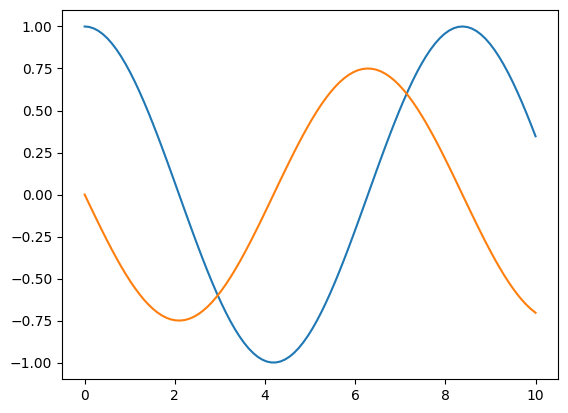

In [14]:
# Defining the system in terms of x1, x2
def rhs(X, t, w):
    x1, x2 = X
    dx1dt = x2
    dx2dt = -w**2*x1
    return [dx1dt, dx2dt]

X0 = [1, 0]
t = np.linspace(0, 10, 100)
w = .75

# Solving
solution = odeint(rhs, X0, t, args=(w,))

plt.plot(t, solution[:,0], label = 'x1')
plt.plot(t, solution[:,1], label = 'x2');

# 2nd Order Harmonic Oscillation with Air Resistance

Second-Order DE

$\ddot{\theta} + k_{1}\dot{\theta}+k_{2}sin(\theta) = 0$

$\dot{\theta} = \dot{x_{1}} = x_{2}$

$\ddot{\theta} = \dot{x_{2}} = -k_{1}\dot{\theta} - k_{2}sin(\theta)$

$\implies \dot{x_{2}} = -k_{1}x_{2} - k_{2}sin(x_{1})$

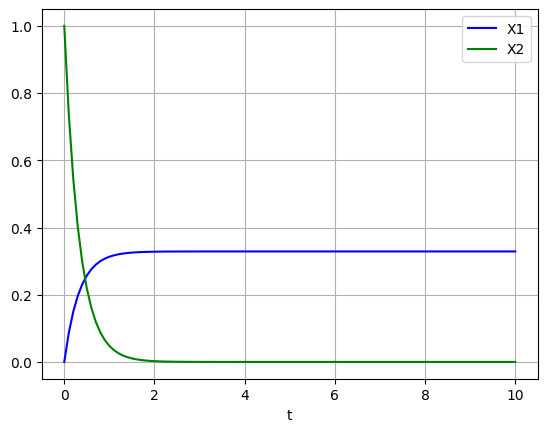

In [3]:
# Definiing the gradient of the system
def rhs(X, t, K):
    dxdt = [X[1], -K[0]*X[1] -K[1]*np.sin(X[0])]
    return dxdt


# Establishing initial conditions, time dimension, and constants
X = [0,1]
t = np.linspace(0, 10, 101)
K = [np.pi-0.1, 0.0]

# Solving the ODE
sol = odeint(rhs, X, t, args=(K,))

plt.plot(t, sol[:, 0], 'b', label='X1')
plt.plot(t, sol[:, 1], 'g', label='X2')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

# Plotting Polar Coordinates

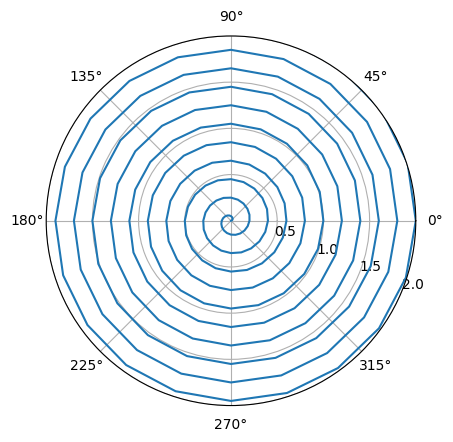

In [4]:
r = np.arange(0, 4, 0.01)
theta = 10 * np.pi * r

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

# Plotting Phase Portrait

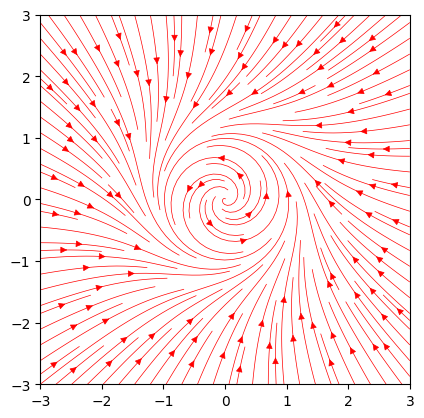

In [5]:
def dF(r, theta):
    return 0.5*r*(1 - r*r), 1+0*theta

X, Y = np.meshgrid(np.linspace(-3.0, 3.0, 30), np.linspace(-3.0, 3.0, 30))
R, Theta = (X**2 + Y**2)**0.5, np.arctan2(Y, X)
dR, dTheta = dF(R, Theta)
C, S = np.cos(Theta), np.sin(Theta)
U, V = dR*C - R*S*dTheta, dR*S+R*C*dTheta

plt.streamplot(X, Y, U, V, color='r', linewidth=0.5, density=1.6)
plt.axis('square')
plt.axis([-3, 3, -3, 3])
plt.show()

In [9]:
from numba import njit
import random
from time import time

n = 1000000

In [10]:
@njit
def monte_carlo_pi(nsamples):
    acc = 0
    for i in range(nsamples):
        x = random.random()
        y = random.random()
        if (x ** 2 + y ** 2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples

start = time()
for i in range(n):
    monte_carlo_pi(100)
end = time()

print(end - start)

0.48709702491760254


In [11]:
def monte_carlo_pi(nsamples):
    acc = 0
    for i in range(nsamples):
        x = random.random()
        y = random.random()
        if (x ** 2 + y ** 2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples

start = time()
for i in range(n):
    monte_carlo_pi(100)
end = time()

print(end - start)

9.679333209991455


In [12]:
@njit( parallel=True)
def simulator(out):
    # iterate loop in parallel
    for i in prange(out.shape[0]):
        out[i] = run_sim()